# Notebook Overview

In this notebook, we will take a closer look at Insurance Claims and figure out some facts about how conditions such as blood pressure, BMI, diabetes, smoking, age, and gender impact the claim value.

We will touch the topics through exploratory data analysis (EDA) using scatter plots, pie charts, histograms etc.

Later we build models, and evaluate them.

Finally, we make predictions, and gauge the predicted figures.

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Load Data

In [3]:
data=pd.read_csv(r"C:\Users\Rushikesh\Downloads\insurance2.csv",header=0)

In [4]:
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

# Correlation of Columns

In [8]:
data.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


<Axes: >

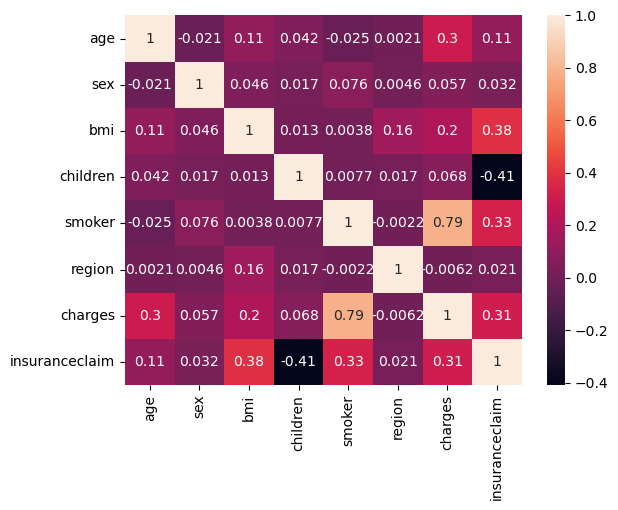

In [10]:
import seaborn as sns
sns.heatmap(data=data.corr(),annot=True)

In [11]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

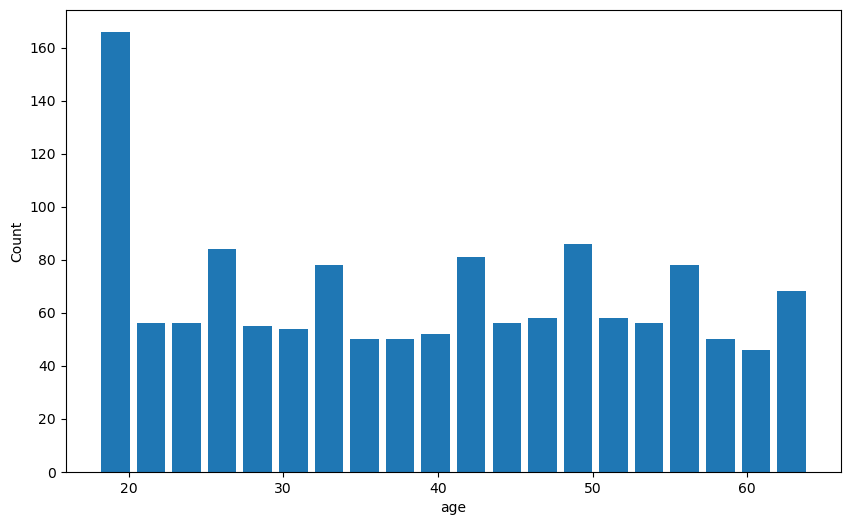

In [13]:
# Age Column Outliea

plt.hist(data["age"],bins=20, rwidth=0.8)
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

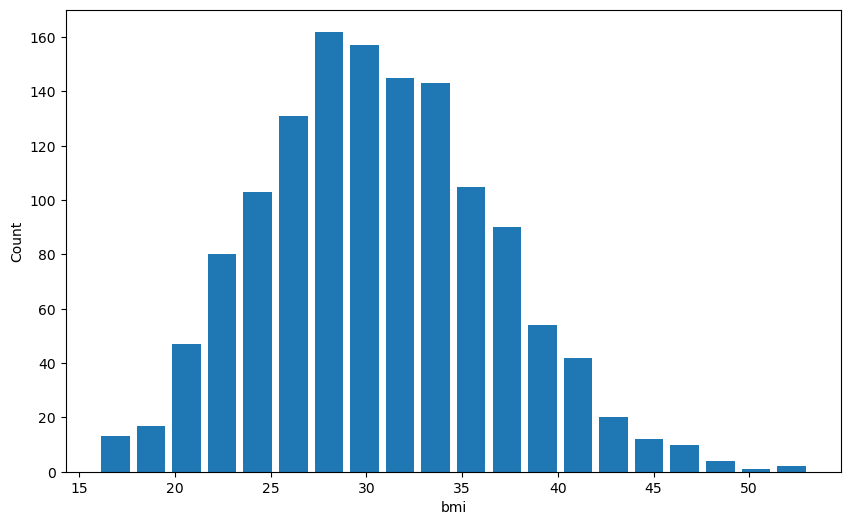

In [14]:
# BMI Column Outliear 
plt.hist(data["bmi"],bins=20, rwidth=0.8)
plt.xlabel('bmi')
plt.ylabel('Count')
plt.show()

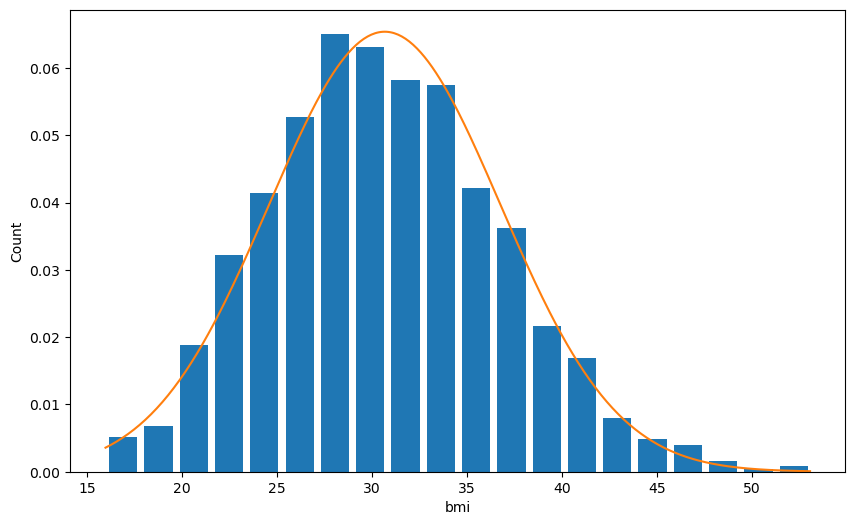

In [18]:
from scipy.stats import norm
import numpy as np
plt.hist(data["bmi"], bins=20, rwidth=0.8, density=True)
plt.xlabel('bmi')
plt.ylabel('Count')
rng = np.arange(data["bmi"].min(), data["bmi"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,data["bmi"].mean(),data["bmi"].std()))

In [19]:
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


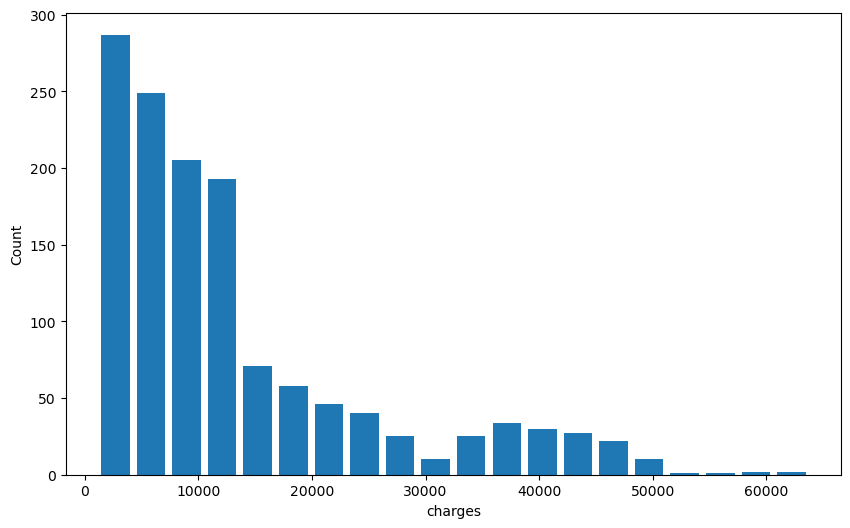

In [20]:
# Charges Column Outliear
plt.hist(data["charges"],bins=20, rwidth=0.8)
plt.xlabel('charges')
plt.ylabel('Count')
plt.show()

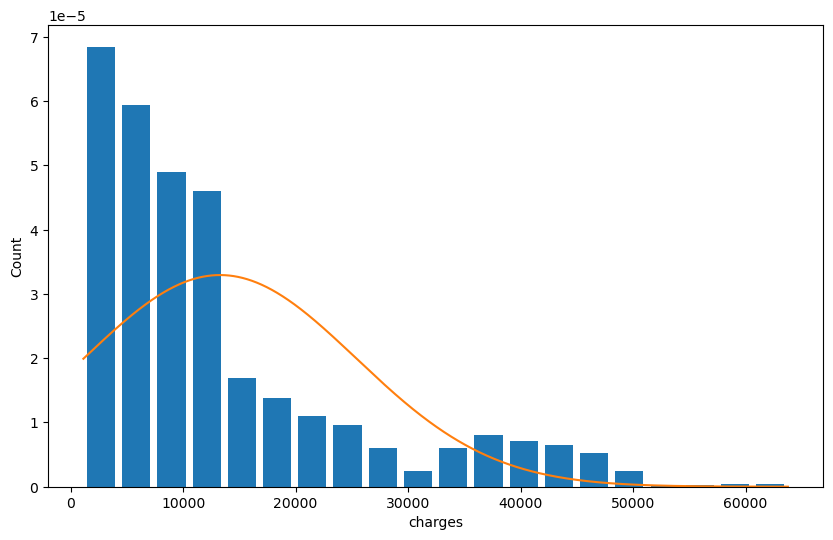

In [21]:
from scipy.stats import norm
import numpy as np
plt.hist(data["charges"], bins=20, rwidth=0.8, density=True)
plt.xlabel('charges')
plt.ylabel('Count')
rng = np.arange(data["charges"].min(), data["charges"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,data["charges"].mean(),data["charges"].std()))

In [47]:

count=pd.value_counts(data['insuranceclaim'],sort=True)

In [48]:
count

1    783
0    555
Name: insuranceclaim, dtype: int64

# SMOTE Technique

In [23]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [24]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

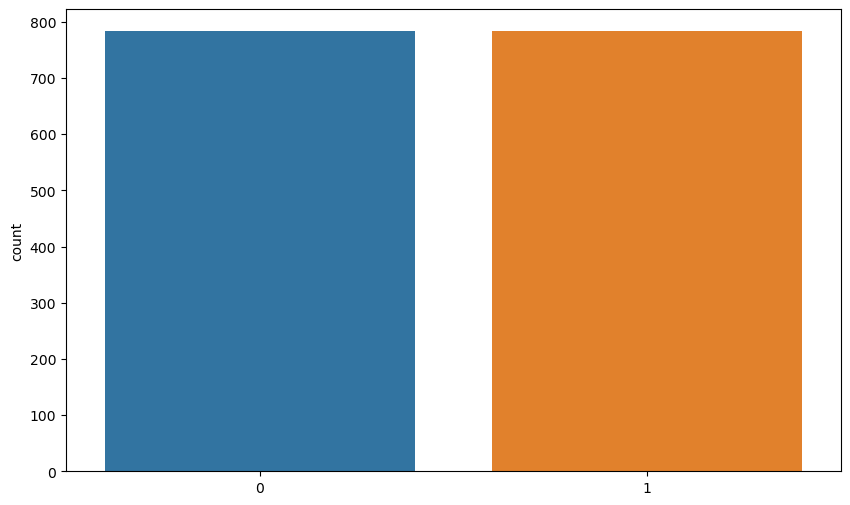

In [25]:
sns.countplot(x=y_data)
plt.show()

# Using Standardization Technique

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_data=ss.fit_transform(x_data)

In [30]:
x_data1=x_data.mean()
x_data2=round(x_data1)
x_data2

0

In [31]:
x_data1=x_data.var()
x_data2=round(x_data1)
x_data2

1

# splitting dataset into Training and Testing set

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=11,stratify=y_data)

# Applying Logistic Regression for checking accuracy

In [34]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data into the model
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
print(list(zip(y_test,y_pred)))

[1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1
 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0
 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0]
[(1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[138  19]
 [ 28 129]]
classification report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       157
           1       0.87      0.82      0.85       157

    accuracy                           0.85       314
   macro avg       0.85      0.85      0.85       314
weighted avg       0.85      0.85      0.85       314

accuracy of the model:  0.8503184713375797


# Naive Bayes Algorithm

In [41]:
from sklearn.naive_bayes import GaussianNB
#create a model
classifier=GaussianNB()
#fitting training data into the model
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
print(list(zip(y_test,y_pred)))

[1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0]
[(1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 1), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[144  13]
 [ 75  82]]
classification report: 
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       157
           1       0.86      0.52      0.65       157

    accuracy                           0.72       314
   macro avg       0.76      0.72      0.71       314
weighted avg       0.76      0.72      0.71       314

accuracy of the model:  0.7197452229299363


# Support Vector Machine

In [44]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=20,gamma=0.1)
svc_model.fit(x_train,y_train)
Y_pred=svc_model.predict(x_test)
print(list(Y_pred))
print(list(zip(y_test,y_pred)))

[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
[(1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), 

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[144  13]
 [ 75  82]]
classification report: 
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       157
           1       0.86      0.52      0.65       157

    accuracy                           0.72       314
   macro avg       0.76      0.72      0.71       314
weighted avg       0.76      0.72      0.71       314

accuracy of the model:  0.7197452229299363


# Conclusion

From all the Above models,Logistic Regression  model has high precision, recall, and F1-score for both classes, and a high overall accuracy, So, it's performing well on this dataset.

Precision is 0.83 for class 0 and 0.87 for class 1. Recall is 0.88 for class 0 and 0.82 for class 1. F1-score is 0.85 for both classes. The accuracy of the model is 0.85, indicating that around 95.7% of the model's predictions were correct.